In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

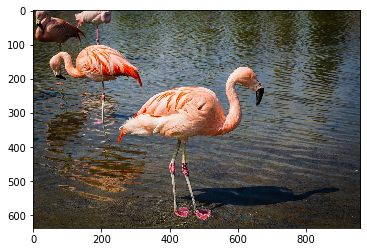

In [2]:
image=cv2.imread('flamingos.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
#convert image to 2d array and 3color values
pixel_vals=image.reshape((-1,3))
pixel_vals=np.float32(pixel_vals)


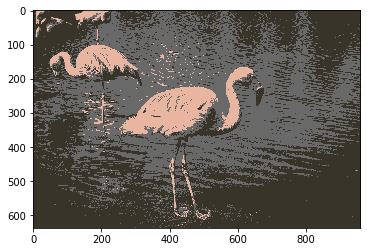

In [18]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

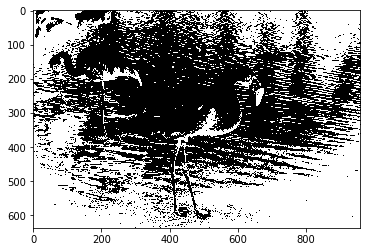

In [24]:
plt.imshow(labels_reshape==2,cmap='gray')

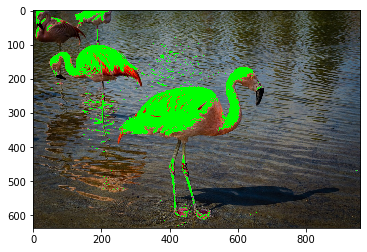

In [26]:
masked_image=np.copy(image)
masked_image[labels_reshape==1]=[0,255,0]
plt.imshow(masked_image)